## Data

In [1]:
# Basic Import Libraries
import pandas as pd
import numpy as np
import re

# Load the dataset
df = pd.read_csv('final_task7_dataset.csv')

# Basic cleaning - Drop any rows where 'review_text' is missing or just empty spaces
df = df.dropna(subset=['review_text'])
df = df[df['review_text'].str.strip() != '']

# Also drop rows where 'rating_x' is missing
df = df.dropna(subset=['rating_x'])

# Reset the index
df = df.reset_index(drop=True)

print(f"Dataset shape after cleaning: {df.shape}")
df.head()


Dataset shape after cleaning: (2599, 42)


,place_id,place_name,review_id,review_link,name_x,reviewer_id,reviewer_profile,rating_x,review_text,published_at,...,featured_image,main_category,categories,workday_timing,is_temporarily_closed,closed_on,address,review_keywords,link,query
0,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChdDSUhNMG9nS0VJQ0FnTURvdzkyQ3dBRRAB,https://www.google.com/maps/reviews/data=!4m8!...,Itchy Feet Foodies,115364016342485480165,https://www.google.com/maps/contrib/1153640163...,5,Nice bar with great smash burgers and a nice p...,2 hours ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
1,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChdDSUhNMG9nS0VJQ0FnTURvcGVuQTVRRRAB,https://www.google.com/maps/reviews/data=!4m8!...,David Bentley,101957826250017754225,https://www.google.com/maps/contrib/1019578262...,5,Finally made there 2 weeks ago. Staff are amaz...,a day ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
2,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChZDSUhNMG9nS0VJQ0FnTURva2FHbUVBEAE,https://www.google.com/maps/reviews/data=!4m8!...,"mike ""id"" mm",111715638420955619035,https://www.google.com/maps/contrib/1117156384...,5,Amazing Bar to travel in the mind into the his...,2 days ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
3,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChZDSUhNMG9nS0VJQ0FnTURvNGR5LU5REAE,https://www.google.com/maps/reviews/data=!4m8!...,Jake Frith,114589423846334117507,https://www.google.com/maps/contrib/1145894238...,5,Great little bar that serves a great Guinness....,2 days ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
4,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChdDSUhNMG9nS0VJQ0FnTURvN296eHRnRRAB,https://www.google.com/maps/reviews/data=!4m8!...,handofwhat,102119327733590225752,https://www.google.com/maps/contrib/1021193277...,2,they have a beautiful illustrated cocktail boo...,3 days ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan


## Text Preproccesing

In [2]:
# NLP libraries
import spacy
import nltk
from nltk.corpus import stopwords

# Downloads
spacy.cli.download('en_core_web_sm')
nltk.download('stopwords')

# Load resources
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

# Import libraries from gensim
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_stop and not token.is_punct]
    # Rejoin tokens into clean string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['processed_text'] = df['review_text'].apply(preprocess_text)


print(f"Shape after processing: {df.shape}")
df[['review_text', 'processed_text']].head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.7 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isabellashaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape after processing: (2599, 43)


,review_text,processed_text
0,Nice bar with great smash burgers and a nice p...,nice bar great smash burger nice pint guinness...
1,Finally made there 2 weeks ago. Staff are amaz...,finally week ago staff amazing especially hann...
2,Amazing Bar to travel in the mind into the his...,amazing bar travel mind history beginning thin...
3,Great little bar that serves a great Guinness....,great little bar serve great guinness service ...
4,they have a beautiful illustrated cocktail boo...,beautiful illustrate cocktail book exist swind...


## TF-IDF vectorization


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization on grouped data
grouped = df.groupby('place_name')['processed_text'].apply(lambda x: ' '.join(x)).reset_index()
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)
tfidf_matrix = tfidf.fit_transform(grouped['processed_text'])
print(f"TF-IDF feature matrix shape: {tfidf_matrix.shape}")

# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

# Reverse index
indices = pd.Series(grouped.index, index=grouped['place_name']).drop_duplicates()

# Defined Reccomender Function
def recommend_places(place_name, cosine_sim=cosine_sim, df=grouped):
    if place_name not in indices:
        return f"Place '{place_name}' not found in the dataset."
    
    idx = indices[place_name]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:min(6, len(sim_scores))]  # added min(6, len(sim_scores)) to not go past available data

    place_indices = [i[0] for i in sim_scores]
    return df['place_name'].iloc[place_indices]

# Testing Recommender
recommended_bars = recommend_places('The Dead Rabbit')
print("Top recommended similar bars:")
print(recommended_bars)


TF-IDF feature matrix shape: (97, 5000)
Cosine similarity matrix shape: (97, 97)
Top recommended similar bars:
54                                           Pebble Bar
73                                  The Four Faced Liar
42                                        King Cole Bar
1     ART Midtown - Rooftop Bars Midtown, NYC (Arlo ...
83                              The Tailor Public House
Name: place_name, dtype: object


## Word2Vec vectorization

In [ ]:
from gensim.models import Word2Vec

# Tokenize processed text into words
df['tokens'] = df['processed_text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=df['tokens'],
    vector_size=100, 
    window=5,        
    min_count=2,    
    workers=4,       
    sg=1             
)

# Function to average word vectors for a document
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in w2v_model.wv]
    if len(doc) == 0: 
        return np.zeros(100) # Return zero vector if no words are in the model
    return np.mean(w2v_model.wv[doc], axis=0)

# Document vectors
doc_vectors = np.array([document_vector(tokens) for tokens in df['tokens']])

print(f"Shape of document vectors: {doc_vectors.shape}")


Shape of document vectors: (2599, 100)


In [ ]:
# Shape: (2599, 100), where each row is a document vector

# Convert to DataFrame
word2vec_df = pd.DataFrame(doc_vectors)
word2vec_df.columns = [f"w2v_{i}" for i in range(word2vec_df.shape[1])]

# Reset index on main df to match word2vec_df
df_reset = df.reset_index(drop=True)
# assert len(df_reset) == len(word2vec_df), "Mismatch in row count!" # used to check alignment

# Concatenate Word2Vec and original dataframes
df_word2vec = pd.concat([df_reset, word2vec_df], axis=1)

#  Save result to a CSV file
df_word2vec.to_csv("word2vec_reviews.csv", index=False)

print("Word2Vec document vectors saved to 'word2vec_reviews.csv'")
print(f"Final shape: {df_word2vec.shape}")


Word2Vec document vectors saved to 'word2vec_reviews.csv'
Final shape: (2599, 144)


## LDA

In [ ]:
# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Optional: filter rare/common terms

corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train LDA model
NUM_TOPICS = 10 
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=NUM_TOPICS,
    passes=10,
    random_state=42,
    per_word_topics=True
)

# Print top words for each topic
for i, topic in lda_model.show_topics(num_topics=NUM_TOPICS, formatted=True):
    print(f"Topic #{i}:")
    print(topic)
    print()

# Assign dominant topic to each document
def get_dominant_topic(lda_model, bow):
    topics = lda_model.get_document_topics(bow)
    if topics:
        return sorted(topics, key=lambda x: x[1], reverse=True)[0][0]
    else:
        return -1

df['lda_dominant_topic'] = [get_dominant_topic(lda_model, doc) for doc in corpus]


df.to_csv("lda_labeled_reviews.csv", index=False)
print("LDA topics assigned and saved to 'lda_labeled_reviews.csv'")

Topic #0:
0.029*"bar" + 0.021*"bartender" + 0.019*"not" + 0.018*"rude" + 0.013*"friend" + 0.013*"experience" + 0.011*"leave" + 0.011*"time" + 0.010*"feel" + 0.010*"man"

Topic #1:
0.054*"wait" + 0.042*"come" + 0.030*"service" + 0.030*"minute" + 0.029*"seat" + 0.027*"people" + 0.024*"hour" + 0.019*"place" + 0.018*"tell" + 0.017*"not"

Topic #2:
0.101*"great" + 0.057*"drink" + 0.027*"spot" + 0.027*"cocktail" + 0.024*"service" + 0.023*"vibe" + 0.020*"bar" + 0.018*"food" + 0.016*"place" + 0.015*"delicious"

Topic #3:
0.052*"bar" + 0.036*"good" + 0.028*"great" + 0.027*"drink" + 0.026*"friendly" + 0.025*"staff" + 0.023*"atmosphere" + 0.018*"nyc" + 0.018*"vibe" + 0.017*"place"

Topic #4:
0.036*"bar" + 0.020*"not" + 0.017*"cocktail" + 0.014*"good" + 0.014*"drink" + 0.011*"time" + 0.010*"reservation" + 0.010*"light" + 0.010*"want" + 0.009*"seat"

Topic #5:
0.082*"good" + 0.033*"food" + 0.032*"drink" + 0.031*"cocktail" + 0.028*"nice" + 0.022*"bar" + 0.020*"place" + 0.019*"atmosphere" + 0.019*"vi

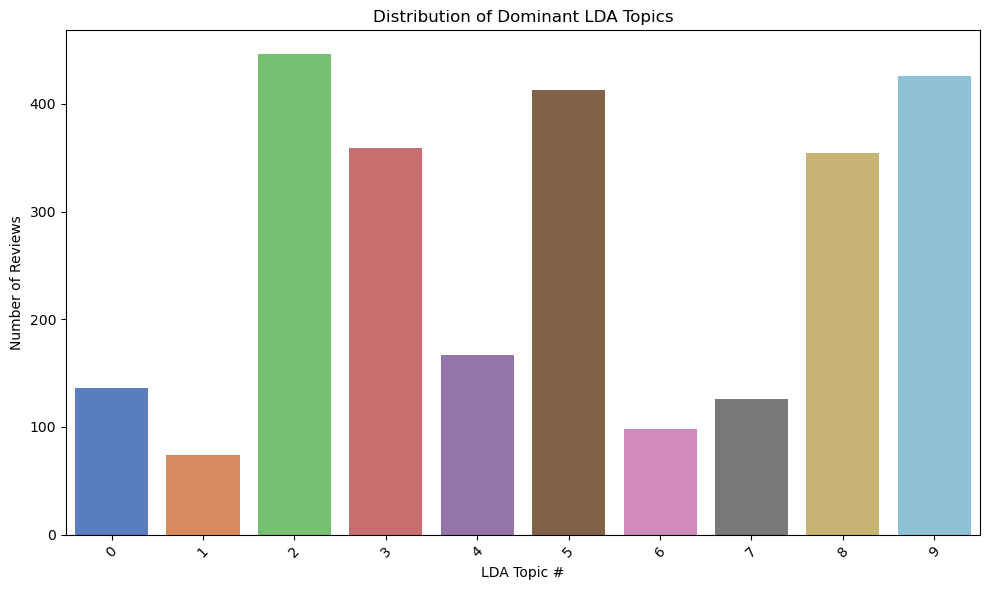

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Count topic frequencies
topic_counts = df['lda_dominant_topic'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='muted')
plt.xlabel('LDA Topic #')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Dominant LDA Topics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Reccomendation System

In [ ]:
# 1. Setup + data filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df_filtered = df[['reviewer_id', 'place_id', 'rating_x']].dropna()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-macosx_11_0_arm64.whl size=485271 sha256=a715db17bfda887f6653c4552ed5cf397092889c6d32fa6f4e066a1da36ccc40
  Stored in directory: /Users/isabellashaya/Library/Caches/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# 2. Content-Based TF-IDF Recommender (already built)

# Group reviews by bar
grouped_reviews = df.groupby('place_name')['processed_text'].apply(lambda x: ' '.join(x)).reset_index()

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(grouped_reviews['processed_text'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
place_indices = pd.Series(grouped_reviews.index, index=grouped_reviews['place_name']).drop_duplicates()

# Recommender
def recommend_places(place_name, cosine_sim=cosine_sim, df=grouped_reviews):
    idx = place_indices[place_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    place_indices_top = [i[0] for i in sim_scores]
    return df['place_name'].iloc[place_indices_top]

# Example usage
print("Content-Based Recommendations:")
print(recommend_places('The Dead Rabbit'))


✅ Content-Based Recommendations:
54                                           Pebble Bar
73                                  The Four Faced Liar
42                                        King Cole Bar
1     ART Midtown - Rooftop Bars Midtown, NYC (Arlo ...
83                              The Tailor Public House
Name: place_name, dtype: object


In [ ]:
# 3. Collaborative Filtering with Surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load into Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_filtered[['reviewer_id', 'place_id', 'rating_x']], reader)

# Train/test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
model = SVD()
model.fit(trainset)

# Evaluate
predictions = model.test(testset)
print("\n Collaborative Filtering Evaluation:")
print("RMSE:", accuracy.rmse(predictions))
print("MAE :", accuracy.mae(predictions))


✅ Collaborative Filtering Evaluation:
RMSE: 1.1537
RMSE: 1.153662318277715
MAE:  0.8512
MAE : 0.8512284619487371


In [ ]:
# 4. Top-N Recommender for Each User
def get_top_n_recommendations(user_id, model, df_all, n=5):
    all_bars = df_all['place_id'].unique()
    rated_bars = df_all[df_all['reviewer_id'] == user_id]['place_id'].unique()
    bars_to_predict = [bar for bar in all_bars if bar not in rated_bars]
    predictions = [model.predict(user_id, bar) for bar in bars_to_predict]
    top_n_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    place_id_to_name = dict(zip(df_all['place_id'], df_all['place_name']))
    results = [(place_id_to_name.get(pred.iid, pred.iid), round(pred.est, 2)) for pred in top_n_preds]
    return results

# Sample user
sample_user = df_filtered['reviewer_id'].iloc[0]
print(f"\n Top-N Recommendations for User: {sample_user}")
for place, score in get_top_n_recommendations(sample_user, model, df):
    print(f"⭐ {place} — Predicted rating: {score}")


🎯 Top-N Recommendations for User: 115364016342485480165
⭐ Jimmy's Corner — Predicted rating: 5
⭐ The Naked Pig — Predicted rating: 4.95
⭐ The Dickens — Predicted rating: 4.88
⭐ Madam Mikette's — Predicted rating: 4.87
⭐ Twist Bar — Predicted rating: 4.8


### TEST

In [ ]:
# Step 1: Set real user + bar IDs
user_id = '115364016342485480165'
bar_id = 'ChIJXz1QXE5ZwokRLwJIVmQhyEc'

# Step 2: Create lookup dictionary for place_id → place_name
place_id_to_name = dict(zip(df['place_id'], df['place_name']))

# Step 3: Predict single rating
pred = model.predict(user_id, bar_id)
bar_name = place_id_to_name.get(bar_id, "Unknown Bar")
print(f"Predicted rating for user '{user_id}' on bar '{bar_name}': {round(pred.est, 2)}")

# Step 4: Top-N recommendation function (if not already defined)
def get_top_n_recommendations(user_id, model, df_all, n=5):
    all_bars = df_all['place_id'].unique()
    rated_bars = df_all[df_all['reviewer_id'] == user_id]['place_id'].unique()
    bars_to_predict = [bar for bar in all_bars if bar not in rated_bars]
    predictions = [model.predict(user_id, bar) for bar in bars_to_predict]
    top_n_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    place_id_to_name = dict(zip(df_all['place_id'], df_all['place_name']))
    return [(place_id_to_name.get(pred.iid, pred.iid), round(pred.est, 2)) for pred in top_n_preds]

# Step 5: Get and print Top-N recommendations for the same user
top_recs = get_top_n_recommendations(user_id, model, df, n=5)
print(f"\nTop 5 recommended bars for user '{user_id}':")
for bar_name, score in top_recs:
    print(f"⭐ {bar_name} — Predicted rating: {score}")

🎯 Predicted rating for user '115364016342485480165' on bar 'The Dickens': 4.88

🔝 Top 5 recommended bars for user '115364016342485480165':
⭐ Jimmy's Corner — Predicted rating: 5
⭐ The Naked Pig — Predicted rating: 4.95
⭐ The Dickens — Predicted rating: 4.88
⭐ Madam Mikette's — Predicted rating: 4.87
⭐ Twist Bar — Predicted rating: 4.8
